In [1]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime
import requests
import io
import pickle
import matplotlib.pyplot as plt
import ffn
%matplotlib inline

# Q1. 畫出 diamond shape

In [2]:
def diamond_1(n):
    for i in range(n):
        print (" "*(n-i) + "♦"*(2*i+1))

In [3]:
def diamond_2(n):
    for i in range(n,-1,-1):
        print (" "*(n-i) + "♦"*(2*i+1))

In [4]:
diamond_1(5)
diamond_2(5)

     ♦
    ♦♦♦
   ♦♦♦♦♦
  ♦♦♦♦♦♦♦
 ♦♦♦♦♦♦♦♦♦
♦♦♦♦♦♦♦♦♦♦♦
 ♦♦♦♦♦♦♦♦♦
  ♦♦♦♦♦♦♦
   ♦♦♦♦♦
    ♦♦♦
     ♦


# Q2. 讀取symbol1&2，刪除重複性的資料並輸出一份新的symbol3.txt

In [5]:
with open('symbols01.txt') as f:
    symbols01=f.read()
    symbols01=set(symbols01.strip().split("\n"))


In [6]:
with open('symbols02.txt') as f:
    symbols02=f.read()
    symbols02=set(symbols02.strip().split("\n"))

In [7]:
symbols03=list(symbols01|symbols02)

In [8]:
symbols03

['CUBA',
 'MAMS',
 'SVBI',
 'FRAN',
 'GLMD',
 'WMIH',
 'SECO',
 'ZKIN',
 'ONVO',
 'BRPA',
 'III',
 'ESND',
 'EIGI',
 'IMGN',
 'TIPT',
 'HAIR',
 'RIOT',
 'NWPX',
 'ZN',
 'DRRX',
 'ADVM',
 'ESCA',
 'OSPR',
 'MITL',
 'YTRA',
 'MCRB',
 'VIAV',
 'OVBC',
 'FUND',
 'OPHC',
 'TXMD',
 'TICC',
 'SNCR',
 'CTIC',
 'RBPAA',
 'LAND',
 'ERYP',
 'GAIA',
 'TRCB',
 'ATTU',
 'TAX',
 'VRAY',
 'INFN',
 'NXEOU',
 'HQCL',
 'SVA',
 'SLVO',
 'PMBC',
 'HALL',
 'GRPN',
 'DWCH',
 'OCUL',
 'CAAS',
 'PFSW',
 'CELH',
 'RVSB',
 'ESGD',
 'TLF',
 'IVTY',
 'VALU',
 'GASS',
 'CCLP',
 'DXGE',
 'DCIX',
 'CBAY',
 'BOCH',
 'ASV',
 'SYNL',
 'CYCCP',
 'CODA',
 'RARX',
 'EXXI',
 'MRBK',
 'VEAC',
 'MMDM',
 'MACK',
 'AKTS',
 'SBBP',
 'MCHX',
 'TCRD',
 'SBBX',
 'ZIV',
 'KNDI',
 'LWAY',
 'WYIG',
 'RBCN',
 'BEBE',
 'MDWD',
 'MRNS',
 'WCFB',
 'IIJI',
 'IMTE',
 'DAIO',
 'FDBC',
 'SCWX',
 'SGRY',
 'OPHT',
 'ACRX',
 'NEPT',
 'QQXT',
 'TTOO',
 'NCMI',
 'XELA',
 'CFMS',
 'RNWK',
 'ALJJ',
 'HOVNP',
 'NEOS',
 'MARA',
 'EDGE',
 'CNAT',
 'KWE

In [9]:
with open ('symbol03.txt','w') as f:
    for symbol in symbols03:
        f.write(symbol.strip().upper()+"\n")

# Q3. 下載台灣上市公司基本資料轉成Dataframe

In [10]:
fundamental = requests.get("http://dts.twse.com.tw/opendata/t187ap03_L.csv")

In [11]:
fundamental.encoding = "big5"

In [12]:
company = fundamental.text.split("\r\n")

In [13]:
company = io.StringIO(fundamental.text)

In [14]:
company_list = pd.read_csv(company, skiprows=1)

In [15]:
company_list

,公司代號,公司名稱,產業別,住址,營利事業統一編號,董事長,總經理,發言人,發言人職稱,代理發言人,...,特別股,編制財務報表類型,股票過戶機構,過戶電話,過戶地址,英文簡稱,英文通訊地址,傳真機號碼,電子郵件信箱,網址
1101,台灣水泥股份有限公司,水泥工業,台北市中山北路2段113號,11913502.0,張安平,李鐘培,黃健強,資深副總經理,蔡立文,(02)2531-7099,...,1.0,中國信託商業銀行代理部,66365566,台北市重慶南路一段83號5樓,TCC,"No.113, Sec.2, Zhongshan N. Rd.,Taipei City 10...",(02)2531-6529,finance@taiwancement.com,http://www.taiwancement.com,NaN
1102,亞洲水泥股份有限公司,水泥工業,台北市大安區敦化南路2段207號30、31樓,3244509.0,徐旭東,李坤炎,周維崑,副總經理,吳玲綾,02-2733-8000,...,1.0,亞東證券股份有限公司,02-2361-8608,台北市重慶南路一段86號3樓,ACC,"30TH FLOOR,TAIPEI METRO TOWER,207.TUN HWA SOUT...",02-2378-5191,service@acc.com.tw,www.acc.com.tw,NaN
1103,嘉新水泥股份有限公司,水泥工業,台北市中山北路2段96號,11892801.0,張剛綸,祁士鉅,王立心,執行副總經理,余曉芸,(02)2551-5211,...,1.0,群益金鼎證券股份有限公司股代部,(02)2702-3999,台北市敦化南路2段97號地下2樓,CHC,"No.96, Sec. 2, Zhongshan N. Rd., Zhongshan Dis...",(02)2511-4002,investor-relations@chcgroup.com.tw,www.chcgroup.com.tw,NaN
1104,環球水泥股份有限公司,水泥工業,台北市南京東路二段125號10樓,7568009.0,侯博義,侯博義,楊宗仁,經理,詹志鴻,02-25077801,...,1.0,凱基證券股份有限公司股務代理部,02-23892999,﹝100﹞台北市重慶南路一段2號5樓,UCC,"10th F1., 125 Nanking E.Rd Sec. 2,Taipei Taiwan",02-25075870,ucc@ucctw.com,www.ucctw.com,NaN
1108,幸福水泥股份有限公司,水泥工業,台北市松江路237號15樓,40601248.0,陳兩傳,陳兩傳,溫秀菊,財務部經理,陳一誠,25092188,...,1.0,永豐金證券股務代理,2381-6288,台北市中正區博愛路17號3樓,LUCKY CEMENT,"15TH FL.,NO.237,SUNG KIANG RD.,TAIPEI,TAIWAN,R...",25048672,"wendy@luckygrp,com.tw",www.luckygrp.com.tw,NaN
1109,信大水泥股份有限公司,水泥工業,台北市寶慶路37號7樓,3279507.0,楊智雄,楊智雄,吳連富,副總經理,林坤榮,(02)23816731,...,1.0,中國信託商業銀行代理部,(02)6636-5566,台北巿重慶南路一段83號5樓,HsingTa,"7TH FL.,No.37 Pao Ching RoadTaipei Taiwan R.O.C.",23314086,service@hsingta.com.tw,www.hsingta.com.tw,NaN
1110,東南水泥股份有限公司,水泥工業,高雄市前金區五福三路21號4樓之1,83078600.0,陳敏斷,吳長直,黃薪翰,財務部經理,唐榮宗,07-2711121,...,1.0,元大證券股份有限公司,02-25865859,台北市承德路三段210號地下室1樓,TUNA CEMENT,"NO.21 Wu Fu 3 RoadKaohsiung, Taiwan, R.O.C.",07-9505895,southeast@secement.com,www.southeastcement.com.tw,NaN
1201,味全食品工業股份有限公司,食品工業,台北市松江路125號,11347802.0,陳永清,蘇守斌,張美凰,財務長,─,(02)25065020,...,1.0,元大證券股務代理部,(02)25865859,台北市大同區承德路3段210號地下一樓,Wei Chuan,"10F., No.125, Sung Chiang Rd.Taipei, Taiwan(R....",(02)25063182,service@weichuan.com.tw,http://www.weichuan.com.tw,NaN
1203,味王股份有限公司,食品工業,台北市中山北路二段79號5樓,7067309.0,陳清福,陳恭平,魏璟雄,經理,李兆弘,(02)25717271,...,1.0,群益金鼎證券股份有限公司,27023999,台北市敦化南路二段97號地下2樓,VE WONG,"5TH FL., 79 CHUNG SHAN N. RD., SEC.2TAIPEI TAIWAN",(02)25811006,wei@vewong.com.tw,http://www.vewong.com,NaN
1210,大成長城企業股份有限公司,食品工業,台南市永康區蔦松二街三號,73008303.0,韓家宇,莊坤炎,周叔恆,特助,常岡德,06-2531111,...,1.0,中國信託商業銀行代理部,02-66365566,台北市重慶南路一段八十三號六樓,GREATWALL,3 NIAOSUN 2TH STREETYONGKONG TAINAN CONTY TAIWAN,06-2534596,john@greatwall-group.com,http://www.dachan.com,NaN


# Q4. 畫出技術曲線

In [16]:
# 讀出下載好的股價資料
with open('stockdata', 'rb') as f:
    data = pickle.load(file=f)

In [17]:
#瀏覽資料中的股票
data.keys()

dict_keys(['TICC', 'TWIN', 'AMOT', 'CDZI', 'GOOG', 'TBNK', 'RICK', 'UTMD', 'YTRA', 'CSML', 'NLNK', 'BLCM', 'CZNC', 'GERN', 'CDXS', 'TTPH', 'SCAC', 'HBCP', 'LCA', 'BBGI', 'TCRD', 'TSLA', 'ISRL', 'BELFB', 'PSC', 'NKSH', 'VRA', 'NEWT', 'AAPL', 'DFRG'])

In [18]:
#選擇目標股票為TESLA
target = data['TSLA']

In [19]:
target

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-12-31,238.509995,243.449997,238.369995,240.009995,240.009995,2715000
2016-01-04,230.720001,231.380005,219.000000,223.410004,223.410004,6827100
2016-01-05,226.360001,226.889999,220.000000,223.429993,223.429993,3186800
2016-01-06,220.000000,220.050003,215.979996,219.039993,219.039993,3779100
2016-01-07,214.190002,218.440002,213.669998,215.649994,215.649994,3554300
2016-01-08,217.860001,220.440002,210.770004,211.000000,211.000000,3628100
2016-01-11,214.009995,214.449997,203.000000,207.850006,207.850006,4089700
2016-01-12,211.600006,213.740005,205.309998,209.970001,209.970001,3091900
2016-01-13,212.009995,212.649994,200.000000,200.309998,200.309998,4126400


In [20]:
#利用20MA和標準差建構布林通道
target['20ma'] = pd.Series.rolling(target['Close'], window=20).mean()
target['SD'] = pd.Series.rolling(target['Close'], window=20).std()

In [21]:
#通道中心線 = 20MA,上線為20MA+2SD,下線為20MA+2SD
target['midbbands']=target['20ma']
target['upbbands'] = target['20ma']+2*target['SD']
target['lowbbands'] = target['20ma']-2*target['SD']

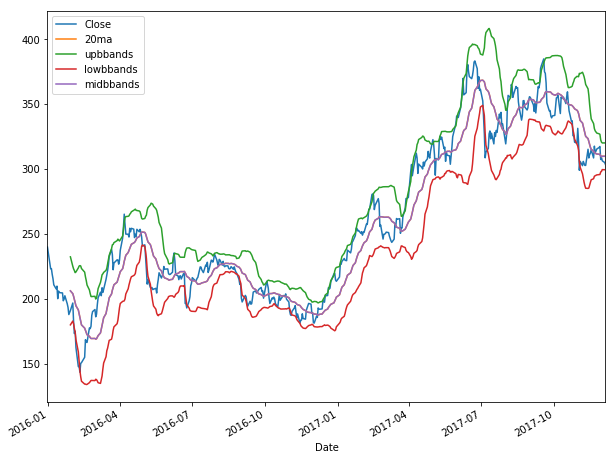

In [22]:
#繪製布林通道
target[['Close','20ma','upbbands','lowbbands','midbbands']].plot(legend='best', figsize=(10,8))

# Q5.策略回測

In [23]:
# 計算 Maximum Drawdown
def DrawDownAnalysis(cumRet):
    dd_series = ffn.core.to_drawdown_series(cumRet)
    dd_details = ffn.core.drawdown_details(dd_series)
    return dd_details['drawdown'].min(), dd_details['days'].max()

In [24]:
# 利用策略產生的持有部位資訊，計算底下四個指標來判斷投資績效
# sharpe ratio: 判斷報酬的好壞跟穩定度，數值越大越好
# maxdd: maximum drawdown, 最糟糕的狀況會賠幾 %
# maxddd: maximum drawdown duration, 低於上一次最高報酬的天數
# cumRet[-1]: 最後賺的 % 數

def indicators(df):
    dailyRet = df['Close'].pct_change()
    excessRet = (dailyRet - 0.04/252)[df['positions'] == 1]
    SharpeRatio = np.sqrt(252.0)*np.mean(excessRet)/np.std(excessRet)
    
    cumRet = np.cumprod(1+excessRet)
    
    maxdd, maxddd = DrawDownAnalysis(cumRet)
    
    return SharpeRatio, maxdd, maxddd, cumRet[-1]

In [25]:
# 這是我們的策略的部分
# 主要只是要算出進出的訊號 signals 跟何時持有部位 positions
# 底下是一個突破系統的範例

def Breakout_strategy(df):
    # Donchian Channel
    df['20d_high'] = np.round(pd.Series.rolling(df['Close'], window=20).max(), 2)
    df['10d_low'] = np.round(pd.Series.rolling(df['Close'], window=10).min(), 2)

    has_position = False
    df['signals'] = 0
    for t in range(2, df['signals'].size):
        if df['Close'][t] > df['20d_high'][t-1]:
            if not has_position:
                df.loc[df.index[t], 'signals'] = 1
                has_position = True
        elif df['Close'][t] < df['10d_low'][t-1]:
            if has_position:
                df.loc[df.index[t], 'signals'] = -1
                has_position = False

    df['positions'] = df['signals'].cumsum().shift()
    return df

In [29]:
def RSI_7030_strategy(df):
    df['RSI'] = talib.RSI(df['Close'].values)
    
    has_position = False
    df['signals'] = 0
    for t in range(2, df['signals'].size):
        if df['RSI'][t-1] < 30:
            if not has_position:
                df.loc[df.index[t], 'signals'] = 1
                has_position = True
        elif df['RSI'][t-1] > 70:
            if has_position:
                df.loc[df.index[t], 'signals'] = -1
                has_position = False

    df['positions'] = df['signals'].cumsum().shift()
    return df

In [35]:
def apply_strategy(strategy, df):
    return strategy(df)

# 我的策略

In [ ]:
def M064810008_strategy(df):
    #策略說明:價格由下向上穿越通道下線時是買進訊號。價格由上往下跌破通道中心線是賣出訊號。
    df['20ma'] = pd.Series.rolling(df['Close'], window=20).mean()
    df['SD'] = pd.Series.rolling(df['Close'], window=20).std()
    df['midbbands']=df['20ma']
    df['upbbands'] = df['20ma']+2*df['SD']
    df['lowbbands'] = df['20ma']-2*df['SD']
    
    has_position = False
    df['signals'] = 0
    
    for t in range(2, df['signals'].size):
        if df['Close'][t] > df['lowbbands'][t-1]  :
            if not has_position:
                df.loc[df.index[t], 'signals'] = 1
                has_position = True
        elif df['Close'][t] < df['midbbands'][t-1] :
            if has_position:
                df.loc[df.index[t], 'signals'] = -1
                has_position = False

    df['positions'] = df['signals'].cumsum().shift()
    return df

In [37]:
# 計算各支股票的回測結果
results = []

#strategies = [Breakout_strategy, RSI_7030_strategy, 學號_strategy]
strategies = [Breakout_strategy, RSI_7030_strategy, M064810008_strategy]

for symbol in data:
    for strategy in strategies:
        try:
            apply_strategy(strategy, data[symbol])
            if np.all(data[symbol]['signals']==0):
                print("Symbol:", symbol, "使用", strategy.__name__, "策略沒有出現買賣訊號。")
                continue
            SharpeRatio, maxdd, maxddd, finalRet = indicators(data[symbol])
            days = (data[symbol].index[-1] - data[symbol].index[0]).days
            results.append((SharpeRatio, maxdd, maxddd, finalRet, days,
                            data[symbol][data[symbol]['signals'] > 0]['signals'].sum(), symbol, strategy.__name__))
        except Exception as e:
            print("Error occurs at symbol:", symbol, "Strategy:", strategy.__name__, "==>", e.args)

Error occurs at symbol: TICC Strategy: RSI_7030_strategy ==> ("name 'talib' is not defined",)
Error occurs at symbol: TWIN Strategy: RSI_7030_strategy ==> ("name 'talib' is not defined",)
Error occurs at symbol: AMOT Strategy: RSI_7030_strategy ==> ("name 'talib' is not defined",)
Error occurs at symbol: CDZI Strategy: RSI_7030_strategy ==> ("name 'talib' is not defined",)
Error occurs at symbol: GOOG Strategy: RSI_7030_strategy ==> ("name 'talib' is not defined",)
Error occurs at symbol: TBNK Strategy: RSI_7030_strategy ==> ("name 'talib' is not defined",)
Error occurs at symbol: RICK Strategy: RSI_7030_strategy ==> ("name 'talib' is not defined",)
Error occurs at symbol: UTMD Strategy: RSI_7030_strategy ==> ("name 'talib' is not defined",)
Error occurs at symbol: YTRA Strategy: RSI_7030_strategy ==> ("name 'talib' is not defined",)
Error occurs at symbol: CSML Strategy: RSI_7030_strategy ==> ("name 'talib' is not defined",)
Error occurs at symbol: NLNK Strategy: RSI_7030_strategy ==>

In [38]:
results_df = pd.DataFrame(results, columns=['sharpe','MaxDrawDown','MaxDrawDownDuration','returns', 
                                            'days', 'entries','symbol','strategy'])

In [39]:
results_df

,sharpe,MaxDrawDown,MaxDrawDownDuration,returns,days,entries,symbol,strategy
0,0.131503,-0.208296,281,0.995734,705,11,TICC,Breakout_strategy
1,0.767239,-0.204117,281,1.333789,705,7,TICC,M064810008_strategy
2,1.365570,-0.361485,299,1.631388,705,12,TWIN,Breakout_strategy
3,1.350303,-0.344285,156,2.538884,705,8,TWIN,M064810008_strategy
4,-0.031885,-0.316309,633,0.922493,705,13,AMOT,Breakout_strategy
5,0.444018,-0.362105,514,1.186757,705,13,AMOT,M064810008_strategy
6,1.052350,-0.224566,334,1.382530,705,10,CDZI,Breakout_strategy
7,0.839308,-0.465049,215,1.641307,705,13,CDZI,M064810008_strategy
8,-0.587688,-0.100582,449,0.903542,705,15,GOOG,Breakout_strategy
9,0.676694,-0.113897,181,1.191368,705,13,GOOG,M064810008_strategy


In [40]:
results_df.sort_values('MaxDrawDown',ascending=False).head()

,sharpe,MaxDrawDown,MaxDrawDownDuration,returns,days,entries,symbol,strategy
18,3.040178,-0.023844,58,1.073352,203,3,CSML,Breakout_strategy
37,-0.404708,-0.055660,273,0.974671,473,9,LCA,M064810008_strategy
36,-1.211961,-0.057928,240,0.957529,473,6,LCA,Breakout_strategy
32,-5.121414,-0.061511,164,0.940172,384,4,SCAC,Breakout_strategy
55,1.928489,-0.086470,269,1.413320,705,11,AAPL,Breakout_strategy


In [41]:
results_df.sort_values('returns',ascending=False).head()

,sharpe,MaxDrawDown,MaxDrawDownDuration,returns,days,entries,symbol,strategy
13,2.174004,-0.157591,127,3.147588,705,12,RICK,M064810008_strategy
39,1.261801,-0.482681,223,2.851112,705,8,BBGI,M064810008_strategy
3,1.350303,-0.344285,156,2.538884,705,8,TWIN,M064810008_strategy
43,1.231019,-0.260455,291,1.881928,705,13,TSLA,M064810008_strategy
56,1.973624,-0.118589,108,1.830943,705,10,AAPL,M064810008_strategy
